# Logistic regression

In [203]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics # to calculate accuracy measure and confusion matrix
import matplotlib.pyplot as plt 
import random
plt.rcParams["figure.figsize"] = (15,6)

# Binary regression

## Load dataset for binary regression

In [257]:
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)
print(datasets.load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Make the data imbalanced

For the purpose of this exercise we will make the data imbalanced by removing 80% of the cases where y==1

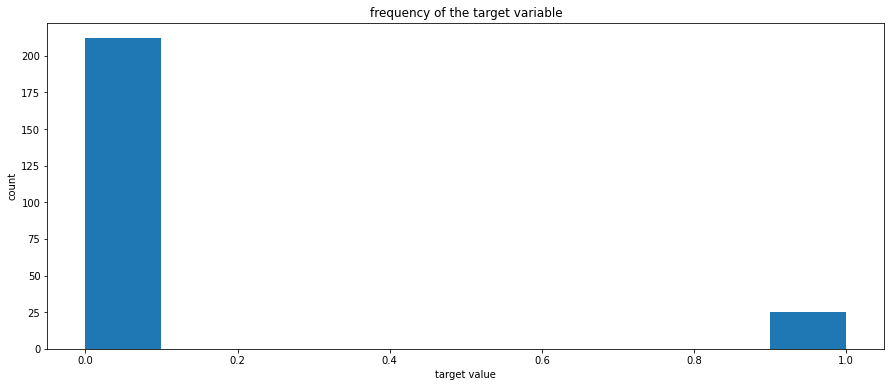

In [334]:
data = pd.concat([X,y], axis=1) # join X and y
data_neg = data.loc[data.target==0,:] # select only rows with negative target 
data_pos = data.loc[data.target==1,:].sample(frac=0.07, random_state=42) # select 7% of rows with positive target

data_imb = pd.concat([data_neg, data_pos]) # concatenate 7% of positive cases and all negative ones to have imbalanced data
X_imb = data_imb.drop(columns=['target'])
y_imb = data_imb.target
plt.title('frequency of the target variable')
plt.xlabel('target value')
plt.ylabel('count')
plt.hist(y_imb);


split to train test

In [335]:
X_train , X_test , y_train , y_test = train_test_split(X_imb, y_imb, random_state=42)

### Exercise

- fit the default LogisticRegression() to X_train, y_train

In [339]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/home/patrik/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

The model failed to converge due to low number of iterations of the optimization solver. There are multiple solvers that can be chosen as a hyperparameter of the model. These also depend on the strategy that is chosen for regularization and for multiclass problem. Description of which solver suits which problem is in the documentation. We have 3 options now. 

- increase number of iterations until the default solver converges
- select a different optimization algorithm with a hyperparameter solver
- scale input data which usually helps optimization algorithms to converge. However, if you do not use regularization the scaling is not required for a logistic regression. It only helps with a convergence 

### Exercise

- scale the data with a StandardScaler()
- fit and transform X_train and save to *X_train_scaled*
- transform X_test and save to *X_test_scaled*

In [340]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Exercise

- fit the logistic regression to the scaled data
- predict on X_train_scaled and save the values to *y_hat*
- what are the values that are returned from the predict() method?

In [345]:
lr.fit(X_train_scaled, y_train)
y_hat = lr.predict(X_train_scaled)
y_hat

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0])

### Exercise

- print different metrics from sklearn.metrics for the predictions on the train set
    - accuracy
    - confusion matrix
    - classification report

In [344]:
print(f'accuracy {metrics.accuracy_score(y_train, y_hat)}')
print(f'confusion matrix\n {metrics.confusion_matrix(y_train, y_hat)}')
print(f'classificaiton report\n {metrics.classification_report(y_train, y_hat)}')

accuracy 0.9887005649717514
confusion matrix
 [[158   0]
 [  2  17]]
classificaiton report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       158
           1       1.00      0.89      0.94        19

    accuracy                           0.99       177
   macro avg       0.99      0.95      0.97       177
weighted avg       0.99      0.99      0.99       177



__WARNING__: You should never optimize for the results of the test set. Test set should be always set aside and you should evaluate only once you have decided for the final model. You will learn later in the course how to treat such situations in the lecture about hyperparameter tuning.

You can see from the confusion matrix that there are only 19 cases of the positive class in the train set while 2 of them were classified incorrectly and 17 correctly. We would rather want to predict correctly all those cases where target = 1. It is not a big deal if we tell the patient that she/he has a cancer while actually there is no cancer. The bigger problem is if we predict that the patient does not have a cancer while she/he actually has it. We can achieve it by changing the value of the threshold that is by default 50%. We shoulde therefore lower the threshold for the probability.

After calling .predict() on your model it returned predicted classes. Instead of predicting classes directly you can return probabilites for each instance using predict_proba() method of logistic regression model. One row is one observation. The first column is the probability that the instance belongs to the first class and the second column tells you about the probability of the instance belonging to the second class. Sum of the first and second column for each instance is equal to 1. Which class is the first and which is the second? You can find out with classes_ attribute of the model.

### Exercise

- return classes with classes_ attribute
- return probabilites of the X_train_scaled with a predict_proba() method
- save the probabilities of the positive class into a variable *probs_train*

In [360]:
print(lr.classes_)
print(lr.predict_proba(X_train_scaled))
probs_train = lr.predict_proba(X_train_scaled)[:,1]

[0 1]
[[9.99986349e-01 1.36506107e-05]
 [9.99973312e-01 2.66875711e-05]
 [9.79098935e-01 2.09010646e-02]
 [2.00482825e-01 7.99517175e-01]
 [1.00000000e+00 3.49121456e-10]
 [9.99997416e-01 2.58440200e-06]
 [9.99633629e-01 3.66370694e-04]
 [9.31155888e-01 6.88441124e-02]
 [8.85064145e-03 9.91149359e-01]
 [9.99790896e-01 2.09104312e-04]
 [9.95498598e-01 4.50140167e-03]
 [9.99962792e-01 3.72079986e-05]
 [9.74699163e-01 2.53008374e-02]
 [4.99662460e-03 9.95003375e-01]
 [9.99999943e-01 5.68867580e-08]
 [9.56507711e-01 4.34922894e-02]
 [9.99999997e-01 3.00053563e-09]
 [1.48637472e-01 8.51362528e-01]
 [9.99984645e-01 1.53546471e-05]
 [9.95172754e-01 4.82724644e-03]
 [9.79316279e-01 2.06837205e-02]
 [9.99991350e-01 8.65019605e-06]
 [9.99724619e-01 2.75380726e-04]
 [9.96203722e-01 3.79627848e-03]
 [9.97917611e-01 2.08238861e-03]
 [9.99985388e-01 1.46117305e-05]
 [9.56593959e-01 4.34060411e-02]
 [9.82767534e-01 1.72324656e-02]
 [9.91508978e-01 8.49102234e-03]
 [9.13715851e-01 8.62841490e-02]
 [9.

### Exercise 

- define the value of a threshold equal to 20%
- use probabilities saved in the variable *probs_train*. If the value of the probability is >= than threshold then the prediction should be equal to 1. Hint: boolean values can be converted to 0/1 with boolean_values.astype(int)
- return confusion_matrix as well as classification_report for a train set

In [361]:
threshold = 0.2
preds_train = (probs>=threshold).astype(int)
print(metrics.confusion_matrix(y_train, preds_train))
print(metrics.classification_report(y_train, preds_train))

[[153   5]
 [  0  19]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       158
           1       0.79      1.00      0.88        19

    accuracy                           0.97       177
   macro avg       0.90      0.98      0.93       177
weighted avg       0.98      0.97      0.97       177



It seems now that all the positive cases are classified correctly thanks to the change of the prediction threshold. Let's check the performance on the test data.

### Exercise

- return probabilites of a positive class from the model on the X_test_scaled dataset
- convert the probabilities into predictions with a threshold 20% as above
- return confusion_matrix and a classification_report

In [362]:
probs_test = lr.predict_proba(X_test_scaled)[:,1]
preds_test=(probs_test>=0.2).astype(int)
print(metrics.confusion_matrix(y_test, preds_test))
print(metrics.classification_report(y_test, preds_test))

[[52  2]
 [ 0  6]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.75      1.00      0.86         6

    accuracy                           0.97        60
   macro avg       0.88      0.98      0.92        60
weighted avg       0.97      0.97      0.97        60



Great. The model classifies all the 6 positive cases correctly on a test set. There are 2 cases when the patient did not have a cancer but the model predicted a cancer. What we actually wanted to optimize here is a recall for a positive class as we want to catch as many positive cases as possible. You can see the values of recall for class 1 as a function of a threshold on the chart below

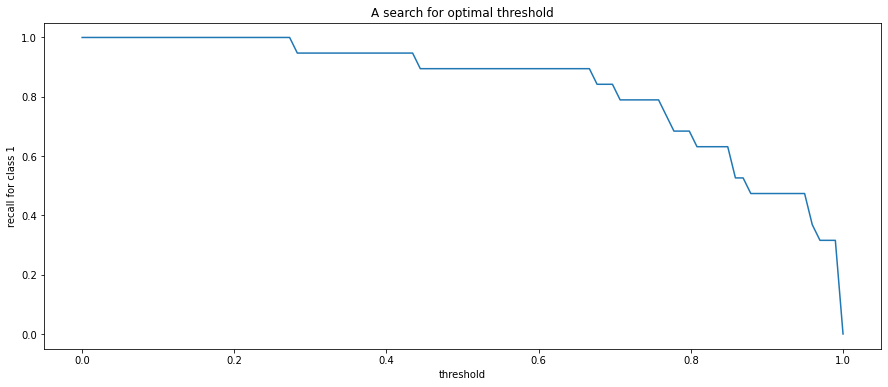

In [375]:
recalls = []
for threshold in np.linspace(0,1,100):
    preds_train = (probs_train>=threshold).astype(int)
    recalls.append(metrics.classification_report(y_train, preds_train, output_dict=True,zero_division=1)['1']['recall'])
plt.xlabel('threshold')
plt.ylabel('recall for class 1')
plt.title("A search for optimal threshold")
plt.plot(np.linspace(0,1,100), recalls)
plt.show()

You can return parameters of the fitted model. This is convenient for automatic retraining of the model where you can extract the parameters of the best model and also set the parameters of the model with set_params(**params).

In [141]:
lr.get_params()

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Regularization

Similarly to linear regression you can apply any of the l1, l2 and elastic net regularization techniques. The strength of the regularization is here defined with a parameter C which is an inverse of alpha. This means that smaller the C the stronger the regularization. Default value is 1.

Different regularization techniques work only with certain solver, e.g. for L1 penalty we have to use either liblinear or saga solver, L2 can be handled with newton-cg, lbfgs and sag solvers, elasticnet works only with saga solver. For elasticnet you can adjust parameter l1_ratio.

### Exercise

- fit the logistic regression on X_train_scaled with a regularization of your choice with a parameter penalty
- change the solver if needed, see documentation
- try different values of C to see the effect on results, try also stroner values like 0.1, 0.01,...
- predict on X_test_scaled and return classification report

In [379]:
lr = LogisticRegression(penalty='l1', C = 0.1, solver='liblinear')
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      0.50      0.67         6

    accuracy                           0.95        60
   macro avg       0.97      0.75      0.82        60
weighted avg       0.95      0.95      0.94        60



In [380]:
print(f'coefficients of the logistic regression:\n {lr.coef_}')

coefficients of the logistic regression:
 [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.         -0.42836648  0.          0.          0.
   0.          0.          0.         -0.62833411  0.          0.        ]]


If you fitted for example LogisticRegression(penalty='l1', C = 0.1, solver='liblinear') you would see that many of the coefficients are equal to 0. This behavior of l1 is expected not only for linear but also for logistic regression.

# Multinomial Logistic Regression

## Load data

We will use here a dataset with a handwritten numbers in a low resolution of 8x8 pixels. One row is 64 values of pixels. There are 10 classes. You can see few examples of obserations in the picture below. We perform also a usual train test split and a scaling of features to help optimizers converge

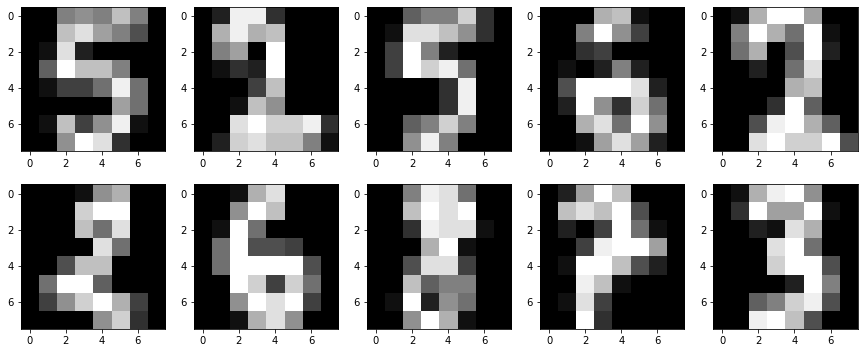

In [386]:
data = datasets.load_digits()
X, y = data.data, data.target
X_train , X_test , y_train , y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for i in range(10):
    plt.subplot(2,5,i+1)
    num = random.randint(0, len(digits.data))
    plt.imshow(data.images[num], cmap=plt.cm.gray, vmax=16, interpolation='nearest')

In [385]:
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Exercise

- fit a default logistic regression on X_train_scaled, y_train
- predict and print the classification report on X_test_scaled

In [395]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_hat = lr.predict(X_test_scaled)

In [392]:
print(metrics.classification_report(y_test, y_hat)) # zero_division=1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
           2       0.97      1.00      0.99        38
           3       0.98      0.93      0.96        46
           4       1.00      0.98      0.99        55
           5       0.95      0.95      0.95        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.93      0.97      0.95        38
           9       0.94      0.96      0.95        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



You can see that in the classification report there is 1 row per 1 class with all the statistics.

If you return probabilites with the predict_proba() method you will see that it has 1 column per 1 class. It is a generalization of the binary case. The sum of all the probabilities per 1 row is equal to 1

In [401]:
probs = lr.predict_proba(X_test_scaled)
print(f'predict_proba shape: {probs.shape}')

predict_proba shape: (450, 10)


Logistic regression can handle multinomial regression without any special setting. There is however a parameter that lets you choose the strategy for the multinomial problem. It is either one_vs_rest or softmax regression. The choice of the strategy is also dependent on the selected solver. I.e. if the solver = 'liblinear' then a softmax regression is not possible. In this case and if the problem is binary, the default strategy for multi_class is one vs rest. Otherwise it is softmax

### Exercise
- fit logistic regression on X_train_scaled, y_train. use parameter multi_class with a value 'ovr' which is one versus rest strategy
- return probabilities

In [404]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train_scaled, y_train)
y_hat = lr.predict(X_test_scaled)
probs = lr.predict_proba(X_test_scaled)
print(f'predict_proba shape: {probs.shape}')
np.sum(probs,axis=1)

predict_proba shape: (450, 10)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])

clf.predict_proba(X[:2, :])
clf.score(X, y)

------------------------------------------------------------------------------------------------------------
Material adapted for RBI internal purposes with full permissions from original authors. Source: https://github.com/zatkopatrik/authentic-data-science